# Principal Component Analysis Essentials in Python

There are multiple ways to optimize you machine learning models. A common way is to reduce the dimensionality of your dataset. You can do it via Feature Selection. A more common way of speeding up a machine learning algorithm is by using Principal Component Analysis (PCA). If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up can be a reasonable choice. This is probably the most common application of PCA. Another common application of PCA is for data visualization.

To understand the value of using PCA for data visualization, the first part of this tutorial post goes over a basic visualization of the IRIS dataset after applying PCA. The second part uses PCA to speed up a machine learning algorithm (logistic regression) on the MNIST dataset.

With that, let’s get started! If you get lost, I recommend opening the [video](https://www.youtube.com/watch?v=kApPBm1YsqU) below in a separate tab.

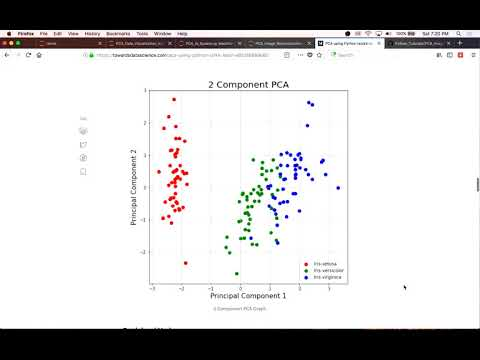

In [1]:
from IPython.lib.display import YouTubeVideo
# https://www.youtube.com/watch?v=kApPBm1YsqU
YouTubeVideo('kApPBm1YsqU')

The code used in this tutorial is from:

- [PCA for Data Visualization](https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb)

- [PCA to Speed-up Machine Learning Algorithms](https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_to_Speed-up_Machine_Learning_Algorithms.ipynb)

## PCA for Data Visualization
For a lot of machine learning applications it helps to be able to visualize your data. Visualizing `2` or `3` dimensional data is not that challenging. However, even the Iris dataset used in this part of the tutorial is `4` dimensional. You can use PCA to reduce that `4` dimensional data into `2` or `3` dimensions so that you can plot and hopefully understand the data better.

__NOTE__: Of course you can do dimension reduction using feature selection - but that is not the point in this tutorial.

### Load Iris Dataset
The Iris dataset is one of datasets `scikit-learn` comes with that do not require the downloading of any file from some external website. The code below will load the iris dataset.

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [ ]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

### Standardize the Data

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use `StandardScaler` to help you standardize the dataset’s features onto unit scale (`mean` = `0` and `variance` = `1`) which is a requirement for the optimal performance of many machine learning algorithms. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data.

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['species']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
x[:5]

<img src = 'https://cdn-images-1.medium.com/max/640/1*Qxyo-uDrmsUzdxIe7Nnsmg.png' />
                            The features in `x` before and after scaling/standardization

### PCA Projection to 2D
The original data has `4` columns (`sepal length`, `sepal width`, `petal length`, and `petal width`). In this section, the code projects the original data which is `4` dimensional into `2` dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

<img src = 'https://cdn-images-1.medium.com/max/640/1*7jUCr36YguAMKNHTN4Gt8A.png' />
PCA with Top 2 Principal Components

In [ ]:
finalDf = pd.concat([principalDf, data[['species']]], axis = 1)

Concatenating DataFrame along `axis = 1`. `finalDf` is the final DataFrame before plotting the data.
<img src = 'https://cdn-images-1.medium.com/max/640/1*4Q1kH0zKeHrnHF7Eg_yhTQ.png' />

### Visualize 2D Projection
This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Explained Variance - How we measure if a PCA is good or not
The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert `4` dimensional space to `2` dimensional space, you lose some of the variance (information) when you do this. By using the attribute `explained_variance_ratio_`, you can see that the first principal component contains `72.77%` of the variance and the second principal component contains `23.03%` of the variance. Together, the two components contain `95.80%` of the information.

In [ ]:
pca.explained_variance_ratio_

In [ ]:
sum(pca.explained_variance_ratio_)

## PCA to Speed-up Machine Learning Algorithms
One of the most important applications of PCA is for speeding up machine learning algorithms. Using the IRIS dataset would be impractical here as the dataset only has `150` rows and only `4` feature columns. The MNIST database of handwritten digits is more suitable as it has `784` feature columns (784 dimensions), a training set of `60,000` examples, and a test set of `10,000` examples.

### Download and Load the Data
You can also add a `data_home` parameter to `fetch_mldata` to change where you download the data.

In [ ]:
from sklearn.datasets import fetch_openml
#my_data_home = './data'
mnist = fetch_openml('mnist_784')


print(mnist.data)

In [ ]:
print(mnist.data.shape)

The images that you downloaded are contained in mnist.data and has a shape of `(70000, 784)` meaning there are 70,000 images with `784` dimensions (`784` features).

The labels (the integers `0`–`9`) are contained in mnist.target. The features are 784 dimensional (`28` x `28` images) and the labels are simply numbers from `0`–`9`.

### Split Data into Training and Test Sets
Typically the train test split is `80%` training and `20%` test. In this case, I chose `6/7th` of the data to be training and `1/7`th of the data to be in the test set.

In [ ]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=2019)


### Standardize the Data
The text in this paragraph is almost an exact copy of what was written earlier. PCA is effected by scale so you need to scale the features in the data before applying PCA. You can transform the data onto unit scale (mean = `0` and variance = `1`) which is a requirement for the optimal performance of many machine learning algorithms. `StandardScaler` helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the [effects of not standardizing your data](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py).

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

### Import and Apply PCA
Notice the code below has `.95` for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that `95%` of the variance is retained.

__NOTE__: This is a very intelligent way of applying PCA - normally you will need to define the number of PCs and function to generate them - now you can rely on `sklearn` to take care of it.

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

Fit PCA on training set. 

__Note__: you are fitting PCA on the training set only.

In [ ]:
pca.fit(train_img)

__Note__: You can find out how many components PCA choose after fitting the model using `pca.n_components_`. In this case, `95%` of the variance amounts to `327` principal components.

In [ ]:
pca.n_components_

Apply the mapping (transform) to both the training set and the test set.

In [ ]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

### Actual Machine Learning - Logistic Regression


Apply Logistic Regression to the Transformed Data. 
__Step 1__: Import the model you want to use

In `sklearn`, all machine learning models are implemented as Python classes.

In [ ]:
from sklearn.linear_model import LogisticRegression

__Step 2__: Make an instance of the Model.

In [ ]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
lr = LogisticRegression(solver = 'lbfgs')

__Step 3__: Training the model on the data, storing the information learned from the data

Model is learning the relationship between digits and labels.

In [ ]:
lr.fit(train_img, train_lbl)

__Step 4__: Predict the labels of new data (new images)

Uses the information the model learned during the model training process.

The code below predicts for __one__ observation.

In [ ]:
# Predict for One Observation (image)
lr.predict(test_img[0].reshape(1,-1))

The code below predicts for multiple observations at once.

In [ ]:
# Predict for One Observation (image)
lr.predict(test_img[0:10])

### Measuring Model Performance

While **accuracy** is not always the best metric for machine learning algorithms (precision, recall, F1 Score, [ROC Curve](https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0), etc would be better), it is used here for simplicity.

__NOTE__: One reason we do not use the other metrics is because this is a **multi-class classification** problem. The other metrics listed above are more proper, or can only be used to **binary classification** problems.

In [ ]:
lr.score(test_img, test_lbl)

Not bad, huh?

### Timing of Fitting Logistic Regression after PCA

The whole point of this section of the tutorial was to show that you can use PCA to speed up the fitting of machine learning algorithms. The table below shows how long it took to fit logistic regression on my MacBook after using PCA (retaining different amounts of variance each time).

<img src = 'https://cdn-images-1.medium.com/max/640/1*xKUK0wLnLHAJYS1zbt-7wA.png' />

You can observe that with less variance retained in your data, the shorter training time is. Also note that we did not always lose model performance (i.e. __accuracy__) while applying PCA. In this case, the best performing model is the one with 95% accuracy retained.

## Closing Thoughts
This is a post that I could have written on for a lot longer as PCA has many different uses. I hope this post helps you with whatever you are working on. PCA is a very useful __dimension reduction__ technique. The only drawback I can think of is that PCA is transforming data in a linear fashion - but that can be a problem since an ocean of data follow non-linear fashions. That is why we use advanced techniques such as [autoencoders](https://www.datacamp.com/community/tutorials/autoencoder-classifier-python) for the same dimension reduction purposes. If you are interested in Autoencoders, please contact me.